# Plots
The following code can be used to recreate the plots from the paper. We provide all relevant datapoints in a dataframe.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Loading recorded outputs

In [2]:
import torch

models_timm_dev=['vit_base_patch16_384_laion2b_in21k_in1k',
                 'vit_base_patch16_384_laion2b_in1k', 'vit_base_patch16_384_openai_in1k',
                 'vit_base_patch16_384_openai_in21k_in1k','vit_base_patch16_384', 'xcit_medium_24_p16_224_dist',
                 'xcit_medium_24_p16_224',]
models_timm_0_6_12=['BiT_m', 'BiT_s', 'vit_base_patch16_224_21kpre', 'vit_base_patch16_384_21kpre', 'convnext_base_in22ft1k', 'convnext_base', 'convnext_tiny-22k', 'deit3_base_patch16_224', 'deit3_base_patch16_224_in21ft1k', 'tf_efficientnetv2_m', 'tf_efficientnetv2_m_in21ft1k', 'swinv2-22k', 'swinv2-1k', 'deit3-384-22k', 'deit3-384-1k', 'tf_efficientnet_b7_ns', 'tf_efficientnet_b7', 'resnet50', 'efficientnet_b0', ]



cleaned_datasets = ['Caracal caracal caracal', 'amphiuma_means', 
                    'aphanizomenon_flosaquae',
                    'araneus_gemma', 
                    'arctocephalus_galapagoensis',
                    'batrachoseps_attenuatus', 
                    'chicken_quesadilla',
                    'cirsium_pitcheri', 'creme_brulee', 'ctenolepisma_longicaudata', 'cup_cakes',
                    'darlingtonia_californica', 'dendrolagus_lumholtzi', 'donuts', 'epithelantha_micromeris',
                    'erysimum_franciscanum', 'f_field_road', 'f_forest_path', 'ferocactus_pilosus', 'haemulon_sciurus',
                    'hippopus_hippopus', 'lasionycteris_noctivagans', 'lathyrus_odoratus', 'lepomis_auritus',
                    'leptoglossus_phyllopus', 'microcystis_wesenbergii', 'octopus_bimaculoides', 'octopus_rubescens',
                    'ozotoceros_bezoarticus', 'platycephalus_fuscus', 'polistes_dominula', 'pseudorca_crassidens',
                    's_sky', 'sarpa_salpa', 'sarracenia_alata', 'sepia_apama', 'sepia_officinalis',
                    'sepioteuthis_australis', 'spaghetti_bolognese', 'streptopus_lanceolatus', 'tapirus_bairdii',
                    'triturus_marmoratus', 'tursiops_aduncus', 'vaccinium_reticulatum', 'waffles', 'skipper_caterpillar']
names_datasets_short={
 'Caracal caracal caracal': 'Caracal',
 'amphiuma_means': '2TAmph',
 'andrias_davidianus': 'CGSala',
 'aphanizomenon_flosaquae': 'AFA',
 'araneus_gemma': 'CatFSp',
 'arcella': 'Arcella',
 'arctocephalus_galapagoensis': 'GFurS',
 'asianellus_festivus': 'AFesti',
 'batrachoseps_attenuatus': 'CSSala',
 'beet_salad': 'BeetS',
 'ceratiomyxa_fruticulosa': 'CFruti',
 'chicken_quesadilla': 'CQuesa',
 'cirsium_pitcheri': 'DThist',
 'creme_brulee': 'CBrûlée',
 'ctenolepisma_longicaudata': 'LTSilF',
 'cup_cakes': 'CCake',
 'darlingtonia_californica': 'CPitch',
 'dendrolagus_lumholtzi': 'LTRoo',
 'donuts': 'Donuts',
 'epithelantha_micromeris': 'EMicro',
 'erysimum_franciscanum': 'Franci',
 'f_field_road': 'FieldRd',
 'f_forest_path': 'ForPth',
 'ferocactus_pilosus': 'MLCact',
 'haemulon_sciurus': 'BSGrunt',
 'hippopus_hippopus': 'HHClam',
 'lasionycteris_noctivagans': 'SilverHB',
 'lathyrus_odoratus': 'SwPea',
 'lepomis_auritus': 'RBSunf',
 'leptoglossus_phyllopus': 'ELFBug',
 'microcystis_wesenbergii': 'MWesen',
 'octopus_bimaculoides': 'C2SOct',
 'octopus_rubescens': 'RubyOct',
 'ozotoceros_bezoarticus': 'PDeer',
 'platycephalus_fuscus': 'DFlath',
 'polistes_dominula': 'EPWasp',
 'pseudorca_crassidens': 'FalseKW',
 'pygoplites_diacanthus': 'RAngelf',
 's_sky': 'Sky',
 'sarpa_salpa': 'Dreamf',
 'sarracenia_alata': 'YTrump',
 'sepia_apama': 'GCuttle',
 'sepia_officinalis': 'CCuttle',
 'sepioteuthis_australis': 'SCalam',
 'spaghetti_bolognese': 'SBolo',
 'streptopus_lanceolatus': 'Rosyb',
 'tapirus_bairdii': 'CATapir',
 'thalassoma_hardwicke': '6BWra',
 'triturus_marmoratus': 'MNewt',
 'tursiops_aduncus': 'IPBNDol',
 'vaccinium_reticulatum': 'ʻōʻai',
 'waffles': 'Waffle',
 'zebrasoma_flavescens': 'YTang',
 'skipper_caterpillar': 'SCaterp',
 'uni': 'Uni',
 'Gaussian': 'Gauss',
 'Rademacher': 'Rade',
 'pixel_perm': 'PxPerm',
 'white': 'White',
 'black': 'Black',
 'grey': 'Grey',
 'monochrome': 'Mono',
 'tricolour': 'Tri',
 'tricolour_primary': 'PrTri',
 'horizontal_stripes': 'Hor',
 'vertical_stripes': 'Ver',
 'low_freq': 'SmN',
 'low_freq_channelfullscale': 'SmN+',
 'low_freq_colorrange': 'SmCol',
 'low_freq_pixel_perm': 'SmPxPerm',
 'blobs': 'Blob'}

datasets_subsampled = ['OOD_Places_MOS_200_full',
 'OOD_Places_MOS_200_ood',
 'OOD_Places_MOS_410_full',
 'OOD_Places_MOS_410_ood',
 'all_species_400_400_full',
 'all_species_400_400_ood',
 'imagenet_o_400_full',
 'imagenet_o_400_ood',
 'textures_400_full',
 'textures_400_ood',
 'textures_400_ViM_4_excluded_classes']
trafos = ['mean', 'max', 'min', 'median']


methods = ['MSP', 'MaxLogit', 'ViM', 'Mahalanobis', 'Energy+React',
                        'Energy', 'KL-Matching', 'knn', 'Relative Mahalanobis']

scores = ['auroc','fpr']

names_short={'BiT_m':'BiT-m', 'BiT_s':'BiT-s','deit3_base_patch16_224':'Deit3-B-224',
             'deit3_base_patch16_224_in21ft1k':'Deit3-B-224-21k', 'vit_base_patch16_384_21kpre':'ViT-B-384-21k',
             'convnext_base':'CnvNxt-B', 'convnext_base_in22ft1k':'CnvNxt-B-21k',
             'tf_efficientnetv2_m_in21ft1k':'EffNetv2-M-21k', 'tf_efficientnetv2_m':'EffNetv2-M',  
             'swinv2-22k':'Swinv2-B-256-21k', 'swinv2-1k':'Swinv2-B-256','deit3-384-22k':'Deit3-B-384-21k',
             'deit3-384-1k':'Deit3-B-384','tf_efficientnet_b7':'EffNetb7','tf_efficientnet_b7_ns':'EffNetb7-ns',
             'vit_base_patch16_224_21kpre':'ViT-B-224-21k', 'convnext_tiny-22k':'CnvNxt-T-21k','resnet50':'ResNet50',
             'efficientnet_b0':'EffNet-B0', 'vit_base_patch16_384_laion2b_in21k_in1k':'ViT-B-384-l2b-21k',
             'vit_base_patch16_384_openai_in1k':'ViT-B-384-oai','vit_base_patch16_384_openai_in21k_in1k':'ViT-B-384-oai-21k',
             'vit_base_patch16_384_laion2b_in1k':'ViT-B-384-l2b','vit_base_patch16_384':'ViT-B-384','xcit_medium_24_p8_384_dist':'XCiT-M24-384',
             'xcit_medium_24_p16_224_dist':'XCiT-M-224-d', 'xcit_medium_24_p16_224':'XCiT-M-224',
             'vit_base_patch16_384_laion2b_in21k_in1k_wo_head':'ViT-B-384-l2b-21k-nohead',
             'vit_base_patch16_384_laion2b_in1k_wo_head':'ViT-B-384-l2b-nohead', 
             'vit_base_patch16_384_openai_in1k_wo_head':'ViT-B-384-oai-nohead','deit_base_384_distilled':'DeiT-B-384-dist',
             'deit_base_384':'DeiT-B-384',
                 'vit_base_patch16_384_openai_in21k_in1k_wo_head':'ViT-B-384-oai-21k-nohead','clip-ViT-B16':'clip-ViT-B-224',
             'clip-ViT-L14-336':'clip-ViT-L-336',
             'all_species_mammals':'all', 'not_clearly_id_mammals':'unclear', 
             'clearly_not_id_mammals':'clearly-ood', 'imagenet_o': 'ImN-O', 'openimage_o':'OpIm-O', 'textures':'texture',
            'Energy':'Ener', 'Mahalanobis':'Maha', 'Energy+React':'E+R', 'MSP':'MSP', 'MaxLogit':'MaxL', 'Residual':'Res',
            'ViM':'ViM', 'KL-Matching':'KL-M', 'knn':'KNN','Relative Mahalanobis':'RMaha','cosine':'Cos', 'cosine-clip':'Cos',
             'mcm-clip':'MCM','mcm':'MCM',
            'OOD_Places_MOS_200_full':'Pl-f', 'OOD_Places_MOS_200_ood':'Pl-c','all_species_400_400_full':'Spc-f',
            'all_species_400_400_ood':'Spc-c','imagenet_o_400_full':'IN-f','imagenet_o_400_ood':'IN-c',
             'textures_400_full':'txt-f','textures_400_ood':'txt-c', 'textures_400_ViM_4_excluded_classes':'txt-43',
             'OOD_Places_MOS_410_full':'Pl-f','OOD_Places_MOS_410_ood':'Pl-c','openimage_o_400_ood':'OpO-c',
     'openimage_o_400_full':'OpO-f',
 'OOD_iNaturalist_MOS_400_ood':'iNat-c',
 'OOD_iNaturalist_MOS_400_full':'iNat-f'}
names_long = {value:key for key,value in names_short.items()}
datasets_unit_tests = ['Gaussian', 'Rademacher', 'black', 'blobs', 'grey', 'horizontal_stripes', 'low_freq', 'low_freq_channelfullscale', 'low_freq_colorrange', 'low_freq_pixel_perm', 'monochrome', 'pixel_perm', 'tricolour', 'tricolour_primary', 'uni', 'vertical_stripes', 'white']


In [3]:
# read saved df
import os
import numpy as np
import pandas as pd
df_raw=pd.read_pickle('model_outputs/df.pkl')

---

## Comparison of results between full and cleaned versions of subsampled OOD datsets

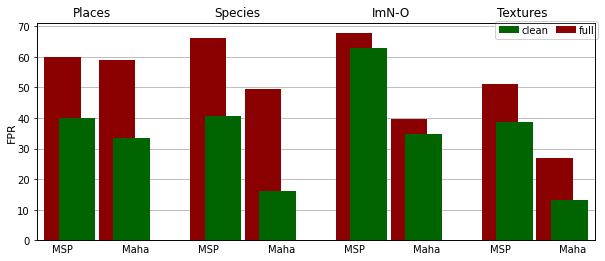

In [4]:
# plot subsampled
import matplotlib.pyplot as plt
datasets_subsamples_common=[
    'OOD_Places_MOS_410',
    'all_species_400_400',
    'imagenet_o_400',
    'textures_400'
]
barplot_names={
    'OOD_Places_MOS_410':'Places',
    'all_species_400_400':'Species',
    'imagenet_o_400':'ImN-O',
    'textures_400':'Textures'
}
model='vit_base_patch16_224_21kpre'
method='Mahalanobis'
methods_ss=['MSP', 'Mahalanobis']
fig, ax=plt.subplots(figsize=(10,4))
ax.set_axisbelow(True)
ax.grid(axis='y')
delta=0.75
width=0.5
for x,dset_common in enumerate(datasets_subsamples_common):
    for i,method in enumerate(methods_ss):
        df = df_raw[(df_raw['model']==model)&(df_raw['dataset'].isin(datasets_subsampled))&(df_raw['method']==method)].copy()
        fpr_full=df[df.dataset==dset_common+'_full'].fpr.values*100
        ax.bar(2*x+i*delta,fpr_full,color='darkred',width=width)
        fpr_clean=df[df.dataset==dset_common+'_ood'].fpr.values*100
        ax.bar(2*x+0.2+i*delta,fpr_clean,color='darkgreen',width=width)

ax.bar(0,0,color='darkgreen',label='clean')
ax.bar(0,0,color='darkred',label='full')
plt.legend(ncol=2, handletextpad=0.2, columnspacing=0.8, framealpha=0.9, loc='upper right', bbox_to_anchor=(1.015,1.03))
ax.set_xticks(range(-1,8),fontsize=12)
ax.set_xticklabels(['']+['MSP','Maha']*4)
ax2=ax.twiny()
ax2.xaxis.set_label_position('top')
ax2.set_xticks([0.4, 2.4, 4.5, 6.3], barplot_names.values(), fontsize=12)
ax.tick_params(axis='x', which='both', length=0)
ax2.tick_params(axis='x', which='both', length=0)
ax2.set_xlim(-0.35,7.3)
ax.set_xlim(-0.35,7.3)
ax.set_ylabel('FPR',labelpad=0,fontsize=11)
plt.show()

In [5]:
df

,model,method,auroc,fpr,acc,dataset
0,vit_base_patch16_224_21kpre,Mahalanobis,0.871282,0.590123,0.84536,OOD_Places_MOS_410_full
0,vit_base_patch16_224_21kpre,Mahalanobis,0.951854,0.333333,0.84536,OOD_Places_MOS_410_ood
0,vit_base_patch16_224_21kpre,Mahalanobis,0.843621,0.495000,0.84536,all_species_400_400_full
0,vit_base_patch16_224_21kpre,Mahalanobis,0.964602,0.162791,0.84536,all_species_400_400_ood
0,vit_base_patch16_224_21kpre,Mahalanobis,0.910095,0.397500,0.84536,imagenet_o_400_full
0,vit_base_patch16_224_21kpre,Mahalanobis,0.925821,0.346278,0.84536,imagenet_o_400_ood
0,vit_base_patch16_224_21kpre,Mahalanobis,0.929164,0.270000,0.84536,textures_400_full
0,vit_base_patch16_224_21kpre,Mahalanobis,0.972476,0.131944,0.84536,textures_400_ood


---

## Cumulative distribution of the % of NINCO-classes for which an FPR at least as low as a given x-value is achieved.

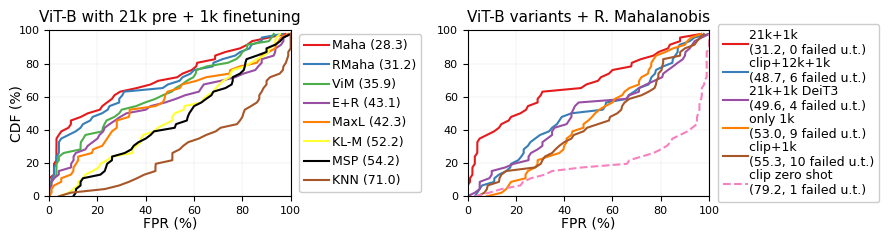

In [6]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
plt.style.use("default")
models_methods_boxplot={'vit_base_patch16_384_21kpre':'Relative Mahalanobis',
                        'vit_base_patch16_384_openai_in21k_in1k':'Relative Mahalanobis',
                        'deit3-384-22k':'Relative Mahalanobis',
                        'vit_base_patch16_384':'Relative Mahalanobis',
                        'vit_base_patch16_384_openai_in1k':'Relative Mahalanobis',                        
                        'clip-ViT-B16':'mcm-clip',
                       }

names_vits={'vit_base_patch16_384_21kpre':'21k+1k',
                        'vit_base_patch16_384':'only 1k',
                        'vit_base_patch16_384_openai_in21k_in1k':'clip+12k+1k',
                        'vit_base_patch16_384_openai_in1k':'clip+1k',                        
                        'clip-ViT-B16':'clip zero shot',
                        'clip-ViT-L14-336':'clip zero shot (L14)',
                        'deit3-384-22k':'21k+1k DeiT3',
                       }
colors=['black', 'firebrick', 'darkkhaki', 'royalblue', 'lime', 'cyan', 'magenta']
i,j=1,0
models_fpr=models_methods_boxplot.keys()
# with plt.rc_context(bundles.icml2022()):
score='fpr'
method='Relative Mahalanobis'


fig, ax = plt.subplots(ncols=2,figsize=(9,2.5))
df = df_raw[(df_raw.dataset.isin(cleaned_datasets))].copy()
# df = df_raw[(df_raw.dataset.isin(cleaned_many))].copy()
df['method_short']=df['method'].apply(lambda x: names_short[x])
df['model_short']=df['model'].apply(lambda x: names_short[x])

grouped = df[(df.method==method)&(df.model.isin(models_fpr))].groupby(['model_short'])

df2 = pd.DataFrame({names_vits[model]:df[(df.model==model)&(df.method==method)]['fpr'].values for model,method in models_methods_boxplot.items()})

df3=df_raw[(df_raw.dataset.isin(datasets_unit_tests))&(df_raw.model.isin(models_fpr))].copy()
df3 = pd.DataFrame({names_vits[model]:df3[(df3.model==model)&(df3.method==method)]['fpr'].values for model,method in models_methods_boxplot.items()})

new_ticklabels=[(i+'\n{} failed u.t.'.format(len(df3[i].values[df3[i].values>0.1]))) for i in df2.columns]
df2.columns=new_ticklabels

legend_elements=[]

NUM_COLORS = len(df2.columns)
cm = plt.get_cmap('Set1')
ax[i].set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for c,col in zip(colors,df2.columns):
    x = np.sort(100*df2[col].values)
    y = 100*np.arange(len(x))/float(len(x))
#     label=col.split('\n')[0] +' ('+str(np.round(100*df2[col].mean(),1))+')\n'+col.split('\n')[1]
    label=col.split('\n')[0] +' \n('+str(np.round(100*df2[col].mean(),1))+', '+col.split('\n')[1]+')'
    l=ax[i].plot(x, y,label=label,linestyle='dashed' if 'zero' in col else 'solid')
    legend_elements += l
ax[i].grid(axis='both',linewidth=.1)
ax[i].set_xlim(0,100)
ax[i].set_ylim(0,100)
ax[i].set_xlabel('FPR (%)',fontsize=10,labelpad=0)
ax[i].set_title('ViT-B variants + R. Mahalanobis',fontsize=11)
legend_elements=legend_elements[0:2]+1*[Line2D([0], [0], color='b', lw=4, label=' \n ',alpha=0.)]+legend_elements[2:]

ax[i].legend(loc='center left', bbox_to_anchor=(1.01, 0.5),ncol=1,framealpha=1.0,handletextpad=0.1,labelspacing=0.,fontsize=9)


model='vit_base_patch16_384_21kpre'#'vit_base_patch16_384_21kpre' 'deit3-384-22k'
methods_cdf=['MSP','KL-Matching','Energy+React','Mahalanobis','knn','ViM','MaxLogit','Relative Mahalanobis']
score='fpr'
df2 = pd.DataFrame({names_short[model]+' '+names_short[method]:df[(df.model==model)&(df.method==method)]['fpr'].values for method in methods_cdf})

meds = df2.median()
meds.sort_values(ascending=False if 'auroc' in score else True, inplace=True)
df2 = df2[meds.index]

df3=df_raw[(df_raw.dataset.isin(datasets_unit_tests))&(df_raw.model==model)].copy()
df3 = pd.DataFrame({names_short[model]+' '+names_short[method]:df3[(df3.model==model)&(df3.method==method)]['fpr'].values for method in methods_cdf})
new_ticklabels=[(i.split(' ')[1]+' ({})'.format(str(np.round(100*df2.mean()[i],1)))) for i in df2.columns]


new_ticklabels=[(i if not 'R.' in i else ('RMaha'+i.split('R.')[1])) for i in new_ticklabels]
df2.columns=new_ticklabels

NUM_COLORS = len(df2.columns)
cm = plt.get_cmap('Set1')
ax[j].set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for col in (df2.columns):
    x = np.sort(100*df2[col].values)
    y = 100*np.arange(len(x))/float(len(x))
    if 'MSP' in col:
        ax[j].plot(x, y,label=col,c='black')
    else:
        ax[j].plot(x, y,label=col)
ax[j].legend(loc='center left', bbox_to_anchor=(1.01, 0.5),ncol=1,framealpha=1.0,handletextpad=0.2,columnspacing=0.8,fontsize=9)

ax[j].grid(axis='both',linewidth=.1)
ax[j].set_xlim(0,100)
ax[j].set_ylim(0,100)
ax[j].set_xlabel('FPR (%)',fontsize=10,labelpad=0)
ax[j].set_title('ViT-B with 21k pre + 1k finetuning',fontsize=11)
ax[0].set_ylabel('CDF (%)',fontsize=10,labelpad=-4)
for a in [0,1]:
    for which in ['major','minor']:
        ax[a].tick_params(axis='both', which=which, labelsize=8)
plt.tight_layout()


---

## FPR on all individual classes of NINCO as bar plots

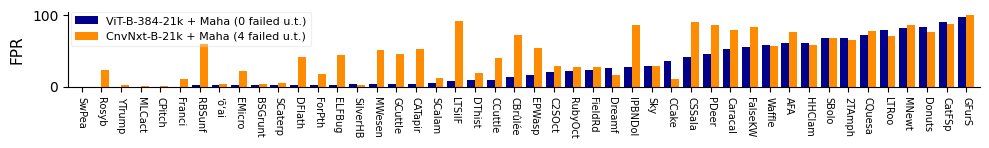

In [7]:
model_1, method_1=  'vit_base_patch16_384_21kpre', 'Mahalanobis'
model_2, method_2= 'convnext_base_in22ft1k', 'Mahalanobis'
df_ut=df_raw[df_raw.dataset.isin(datasets_unit_tests)]
nfailed_1=sum(df_ut[(df_ut.model==model_1)&(df_ut.method==method_1)].fpr>0.1)
nfailed_2=sum(df_ut[(df_ut.model==model_2)&(df_ut.method==method_2)].fpr>0.1)

df_bar = df_raw[(df_raw.model==model_1)&(df_raw.method==method_1)&(df_raw.dataset.isin(cleaned_datasets))].sort_values('fpr')
df_bar_2 = df_raw[(df_raw.model==model_2)&(df_raw.method==method_2)&(df_raw.dataset.isin(cleaned_datasets))].sort_values('fpr')

import numpy as np
import matplotlib.pyplot as plt
with plt.rc_context({
    "axes.spines.right": False,
    "axes.spines.top": False,
}):
    plt.figure(figsize=(10,1.6))
    X = df_bar.dataset
    X = X.apply(lambda x: (names_datasets_short[x] if len(names_datasets_short[x])<5 else names_datasets_short[x][0:10]))
    Y = df_bar.fpr
    Z = np.array([df_bar_2[df_bar_2.dataset==dataset].fpr.item() for dataset in df_bar.dataset.values])

    X_axis = np.arange(len(X))
    plt.bar(X_axis - 0.2, 100*Y, 0.4, label = names_short[model_1]+' + '+names_short[method_1]+' ({} failed u.t.)'.format(nfailed_1),color='darkblue')
    plt.bar(X_axis + 0.2, 100*Z, 0.4, label = names_short[model_2]+' + '+names_short[method_2]+' ({} failed u.t.)'.format(nfailed_2),color='darkorange')
    plt.xlim(min(X_axis)-0.7,max(X_axis)+0.7)
    plt.xticks(X_axis, X,rotation=-90,fontsize=7)
    plt.ylabel("FPR",labelpad=5, fontsize=11)
    plt.legend(loc='upper left',bbox_to_anchor=(-.003,1.075),fontsize=8.,framealpha=0.3)
    plt.tight_layout()
    plt.show()

---

## Mean FPR on NINCO over ImageNet-1K accuracy for all models as a scatter plot

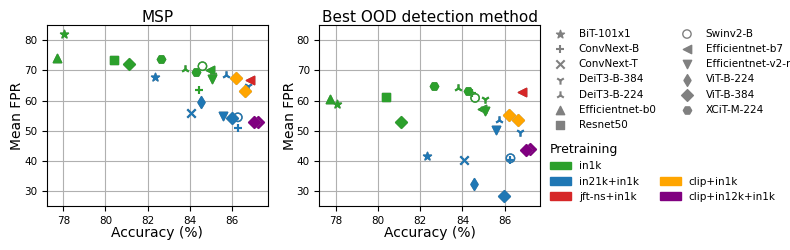

In [8]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

models_both=models_timm_0_6_12+models_timm_dev
model_to_architecture={
    'vit_base_patch16_384_openai_in21k_in1k':'ViT-B-384',
    'vit_base_patch16_384_openai_in1k':'ViT-B-384',
    'vit_base_patch16_384':'ViT-B-384',
    'vit_base_patch16_384_laion2b_in1k':'ViT-B-384',
    'vit_base_patch16_384_laion2b_in21k_in1k':'ViT-B-384',
     'vit_base_patch16_384_21kpre':'ViT-B-384',
    'vit_base_patch16_224_21kpre':'ViT-B-224',
 'swinv2-1k':'Swinv2-B',
 'swinv2-22k':'Swinv2-B',
 'deit3-384-1k':'DeiT3-B-384',
 'deit3-384-22k':'DeiT3-B-384',
 'deit3_base_patch16_224':'DeiT3-B-224',
 'deit3_base_patch16_224_in21ft1k':'DeiT3-B-224',
 'convnext_base':'ConvNext-B',
 'convnext_base_in22ft1k':'ConvNext-B',
    'convnext_tiny-22k':'ConvNext-T',
 'tf_efficientnet_b7':'Efficientnet-b7',
 'tf_efficientnet_b7_ns':'Efficientnet-b7',
 'BiT_s':'BiT-101x1',
 'BiT_m':'BiT-101x1',
 'tf_efficientnetv2_m':'Efficientnet-v2-m',
 'tf_efficientnetv2_m_in21ft1k':'Efficientnet-v2-m',
    'resnet50':'Resnet50',
    'efficientnet_b0':'Efficientnet-b0',
    'xcit_medium_24_p16_224_dist':'XCiT-M-224',
    'xcit_medium_24_p16_224':'XCiT-M-224',    
}
methods=['MSP',
 'MaxLogit',
 'Energy',
 'KL-Matching',
 'Mahalanobis',
 'Relative Mahalanobis',
 'ViM',
 'Energy+React',
 'knn',
 'cosine',
 'mcm',
'mcm-clip']
architecture_to_marker = {
    'ViT-B-384': 'D',
 'ViT-B-224': 'd',
 'Swinv2-B': 'o',
 'DeiT3-B-384': '1',
 'DeiT3-B-224': '2',
 'ConvNext-B': '+',
 'ConvNext-T': 'x',
 'Efficientnet-b7': '<',
 'BiT-101x1': '*',
 'Efficientnet-v2-m': 'v',
 'Resnet50': 's',
 'Efficientnet-b0': '^',
'XCiT-M-224':'H',
'CLIP ViT-L14':'8',
    'DeiT-B-384':'3',
    
}

model_to_pretraining={
    'vit_base_patch16_384_openai_in21k_in1k':'clip+in12k+in1k',
        'vit_base_patch16_384_openai_in1k':'clip+in1k',
        'vit_base_patch16_384':'in1k', 
    'vit_base_patch16_384_laion2b_in1k':'clip+in1k',
    'vit_base_patch16_384_laion2b_in21k_in1k':'clip+in12k+in1k',
        'vit_base_patch16_384_21kpre':'in21k+in1k',
    'vit_base_patch16_224_21kpre':'in21k+in1k',
 'swinv2-1k':'in1k',
 'swinv2-22k':'in21k+in1k',
 'deit3-384-1k':'in1k',
 'deit3-384-22k':'in21k+in1k',
 'deit3_base_patch16_224':'in1k',
 'deit3_base_patch16_224_in21ft1k':'in21k+in1k',
 'convnext_base':'in1k',
 'convnext_base_in22ft1k':'in21k+in1k',
    'convnext_tiny-22k':'in21k+in1k',
 'tf_efficientnet_b7':'in1k',
 'tf_efficientnet_b7_ns':'jft-ns+in1k',
 'BiT_s':'in1k',
 'BiT_m':'in21k+in1k',
 'tf_efficientnetv2_m':'in1k',
 'tf_efficientnetv2_m_in21ft1k':'in21k+in1k',
    'resnet50':'in1k',
    'efficientnet_b0':'in1k', 
        'xcit_medium_24_p16_224_dist':'in1k',
    'xcit_medium_24_p16_224':'in1k',
        'clip-ViT-B16':'clip zero-shot',
    'clip-ViT-L14-336':'clip zero-shot',
    'deit_base_384_distilled':'in1k',
    'deit_base_384':'in1k',
}
dataset_to_color = {
    'in1k':'tab:green',
    'in21k+in1k':'tab:blue',
    'jft-ns+in1k': 'tab:red',
    'clip+in1k':'orange',
    'clip+in12k+in1k':'purple',
}
nonempty_markers={'1','2','3','4','+','x', ''}
empty_markers={'o',
              }
score='fpr'
methods_=['MSP','Best OOD detection method']
# methods_=['MSP','Relative Mahalanobis']
# methods_=['MSP','best']
# models_both=models
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
scale_factor=2
fig, ax = plt.subplots(1, 2, figsize=(2*2. * scale_factor, 1.3 * scale_factor))
legend_elements=[]
for i,method in enumerate(methods_):
    if 'Best' in method:
        df_mega = df_raw[(df_raw['dataset'].isin(cleaned_datasets))&(df_raw['model'].isin(models_both))&(df_raw['method'].isin(methods))]
    else:
        df_mega = df_raw[(df_raw['dataset'].isin(cleaned_datasets))&(df_raw['method']==method)&(df_raw['model'].isin(models_both))]
    df_mega=df_mega.groupby(['model','method','acc']).agg({score:'mean'}).reset_index()
    df_mega = df_mega.sort_values(score,ascending=True if score=='fpr' else False).groupby('model',as_index=False).first()
    df_mega['pretraining']=df_mega['model'].apply(lambda x: model_to_pretraining[x])
    df_mega['name_short']=df_mega['model'].apply(lambda x: names_short[x])
    df_mega['architecture']=df_mega['model'].apply(lambda x: model_to_architecture[x])
    df_mega['color']=df_mega['pretraining'].apply(lambda x: dataset_to_color[x])
    df_mega['marker']=df_mega['architecture'].apply(lambda x: architecture_to_marker[x])
    
    ax[i].set_title(method,fontsize=11,pad=0)
    ax[i].set_xlabel('Accuracy (%)',labelpad=0)
    ax[i].set_ylabel('Mean '+score.upper(),labelpad=0)
    if score=='fpr':
        ax[i].set_ylim(25.,85.)
    else:
        ax[i].set_ylim(0.75,0.95)        
    for _,row in df_mega.iterrows():
        x=[row['acc']*100]
        y=[row[score]*100]
        color=row['color']
        marker=row['marker']
        facecolor='grey' if marker not in empty_markers else 'none'
        label=row['architecture']#+'-'+row['pretraining']+': '+names_short[row['method']]
        l = ax[i].scatter(x,y,edgecolor='grey',marker=marker,label=label,facecolor=facecolor)
        if row['pretraining']=='in1k' and i==0 and row['model']!='xcit_medium_24_p16_224_dist' and row['model']!='deit_base_384_distilled':
            legend_elements += [l]
        if ((row['model']=='vit_base_patch16_224_21kpre' or 'tiny' in row['model']) and i==0) or ('L14' in row['model']):
            legend_elements += [l]
        facecolor=color if marker not in empty_markers else 'none'
        ax[i].scatter(x,y,edgecolor=color,marker=marker,label=label,facecolors=facecolor)
        for which in ['major','minor']:
            ax[i].tick_params(axis='both', which=which, labelsize=7.5)
legend_elements_2=[]
for dataset,color in dataset_to_color.items():
    legend_elements_2+=[Patch(facecolor=color, edgecolor=color,label=dataset)]
legend_elements_2=legend_elements_2[0:3]+1*[Line2D([0], [0], color='b', lw=4, label='',alpha=0.)]+legend_elements_2[3::]
l1=ax[1].legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1, 0.7),framealpha=0.,fontsize=7.5,ncol=2)
l2=ax[1].legend(title='Pretraining',handles=legend_elements_2, bbox_to_anchor=(1., 0.4),framealpha=0.,fontsize=7.5,ncol=2)
l2.get_title().set_fontsize('9')
l2._legend_box.align = "left"
ax[1].add_artist(l1)
ax[0].set_axisbelow(True)
ax[1].set_axisbelow(True)
ax[1].grid()
ax[0].grid()
plt.tight_layout()
plt.show()